170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 353s 2us/step


C:\Users\ASWANTH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 58ms/step - accuracy: 0.3515 - loss: 1.7437 - val_accuracy: 0.5267 - val_loss: 1.3052
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5714 - loss: 1.2038 - val_accuracy: 0.6243 - val_loss: 1.0572
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6415 - loss: 1.0231 - val_accuracy: 0.6406 - val_loss: 1.0355
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6793 - loss: 0.9165 - val_accuracy: 0.6723 - val_loss: 0.9324
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7096 - loss: 0.8301 - val_accuracy: 0.6960 - val_loss: 0.8729
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7353 - loss: 0.7598 - val_accuracy: 0.6773 - val_loss: 0.9080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7546 - loss: 0.6993 - val_accuracy: 0.7045 - val_loss: 0.8692
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.7713

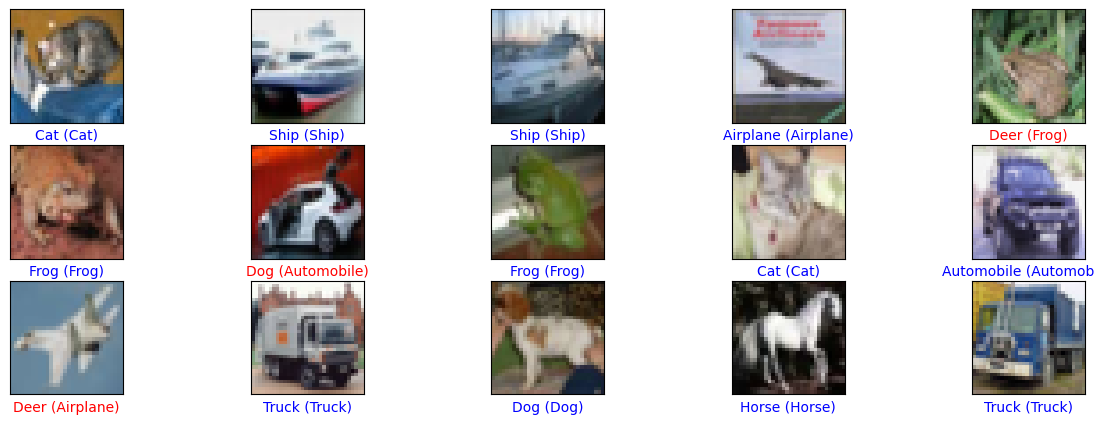

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the class names in CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)

# Visualize some predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = class_names[np.argmax(predictions_array)]
    true_label = class_names[true_label[0]]  # Extract true label value from the array
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

# Plot the first 15 images, their predicted labels, and the true labels
plt.figure(figsize=(15, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plot_image(i, predictions, test_labels, test_images)

plt.show()
